In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor
import yfinance as yf

sns.set_style('whitegrid')
%matplotlib inline

In [208]:
start = "2000-01-01"
stop  = "2021-10-01"
stock = yf.Ticker('AAPL')

df = stock.history(start=start, end=stop)

df['Returns'] = df['Close'].pct_change()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns
Date,,,,,,,,
1999-12-31,0.773809,0.788662,0.762789,0.788183,163811200,0.0,0.0,NaN
2000-01-03,0.803995,0.862449,0.779558,0.858137,535796800,0.0,0.0,0.088753
2000-01-04,0.829868,0.848075,0.775725,0.785788,512377600,0.0,0.0,-0.084310
2000-01-05,0.795370,0.847596,0.789621,0.797286,778321600,0.0,0.0,0.014633
2000-01-06,0.813578,0.820285,0.728290,0.728290,767972800,0.0,0.0,-0.086538
...,...,...,...,...,...,...,...,...
2021-09-24,145.660004,147.470001,145.559998,146.919998,53477900,0.0,0.0,0.000613
2021-09-27,145.470001,145.960007,143.820007,145.369995,74150700,0.0,0.0,-0.010550
2021-09-28,143.250000,144.750000,141.690002,141.910004,108972300,0.0,0.0,-0.023801


In [209]:
df[['Close','Dividends','Stock Splits', 'Returns']].describe()

,Close,Dividends,Stock Splits,Returns
count,5473.000000,5473.000000,5473.000000,5472.000000
mean,21.661380,0.001036,0.002741,0.001285
std,31.530230,0.012953,0.115469,0.025354
min,0.201162,0.000000,0.000000,-0.518692
25%,1.297584,0.000000,0.000000,-0.010272
50%,9.653302,0.000000,0.000000,0.000903
75%,27.050938,0.000000,0.000000,0.013046
max,156.690002,0.220000,7.000000,0.139049


In [210]:
df[['Close','Returns']].loc[df['Returns']==df['Returns'].min()]

,Close,Returns
Date,,
2000-09-29,0.39481,-0.518692


In [211]:
df[['Close','Returns']].loc[df['Returns']==df['Returns'].max()]

,Close,Returns
Date,,
2008-10-13,3.381108,0.139049


In [212]:
#sns.distplot(df_returns.dropna(),bins=100,color='purple')

In [213]:
# model specification
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "manhattan", contamination = 0.02) # model fitting
y_pred = model1.fit_predict(df[['Close']])
y_pred_ret = model1.fit_predict(df[['Returns']].dropna())

In [221]:
# filter outlier index
outlier_index  = np.where(y_pred == -1) # negative values are outliers and positives inliers# filter outlier values
outlier_index_ret  = np.where(y_pred_ret == -1) # negative values are outliers and positives inliers# filter outlier values
outlier_values = df['Close'].iloc[outlier_index]
outlier_values_ret = df['Returns'].iloc[outlier_index]
outlier_values_ret = outlier_values_ret.to_frame()
outlier_values_ret['Close'] = df['Close'].iloc[outlier_index]
df_outlier     = outlier_values
outlier_values = outlier_values.to_frame()
outlier_values

,Close
Date,
2000-01-12,0.668399
2000-03-21,1.034460
2000-04-03,1.022003
2000-05-22,0.689480
2000-05-23,0.657857
...,...
2021-09-20,142.940002
2021-09-21,143.429993
2021-09-28,141.910004


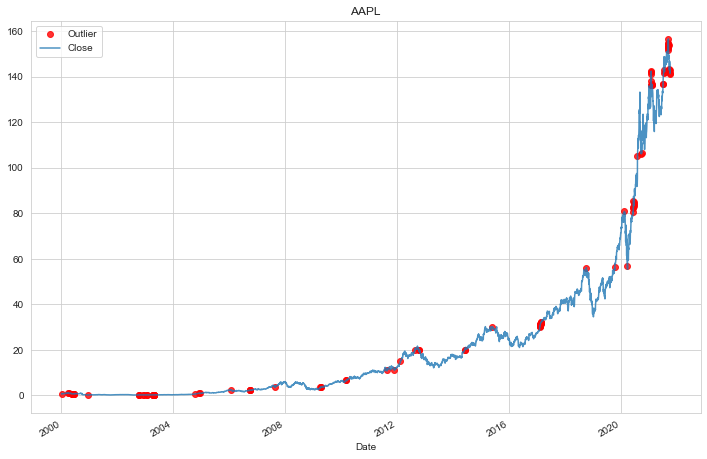

In [215]:
outlier_values_ret['Close'].plot(figsize=(12,8),style='o',color='red', label='Outlier',alpha=.8)
df['Close'].plot(figsize=(12,8), label='Close',alpha=.8)


plt.title('AAPL')
plt.legend()
plt.show()

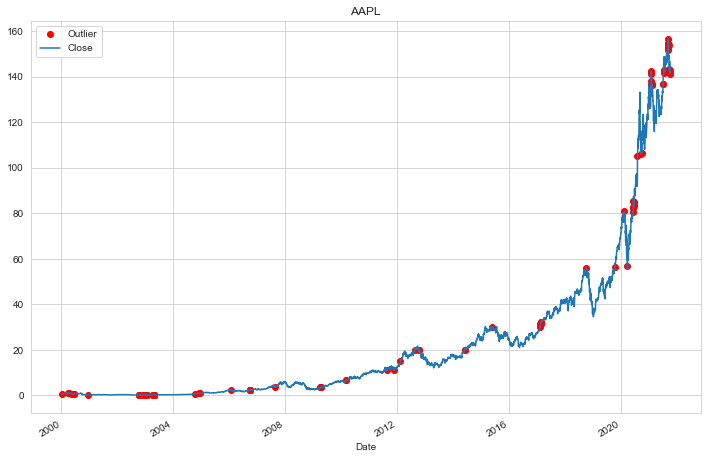

In [220]:
outlier_values['Close'].plot(figsize=(12,8),style='o',color='red', label='Outlier')
df['Close'].plot(figsize=(12,8), label='Close')


plt.title('AAPL')
plt.legend()
plt.show()

In [217]:
#outlier_date = df['Date'].iloc[outlier_index]

In [218]:
import plotly
import cufflinks as cf
cf.go_offline()
df.xs(key='Close',axis=1).iplot()
plt.show()

In [219]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.histogram(df, x=df.index, y="Close", histfunc="avg", title="AAPL")
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True, ticklabelmode="period")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers", x=outlier_values.index, y=outlier_values["Close"], name="Outliers"))
fig.show()